<a href="https://colab.research.google.com/github/VindhyaSRajan/Master-s-Thesis/blob/BERT/BERT_Vocab_Embedding_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 133kB 2.8MB/s 


In [0]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from pytorch_pretrained_bert import BertTokenizer

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 5679545.94B/s]


In [6]:
tokenizer.vocab.keys()

odict_keys(['[PAD]', '[unused0]', '[unused1]', '[unused2]', '[unused3]', '[unused4]', '[unused5]', '[unused6]', '[unused7]', '[unused8]', '[unused9]', '[unused10]', '[unused11]', '[unused12]', '[unused13]', '[unused14]', '[unused15]', '[unused16]', '[unused17]', '[unused18]', '[unused19]', '[unused20]', '[unused21]', '[unused22]', '[unused23]', '[unused24]', '[unused25]', '[unused26]', '[unused27]', '[unused28]', '[unused29]', '[unused30]', '[unused31]', '[unused32]', '[unused33]', '[unused34]', '[unused35]', '[unused36]', '[unused37]', '[unused38]', '[unused39]', '[unused40]', '[unused41]', '[unused42]', '[unused43]', '[unused44]', '[unused45]', '[unused46]', '[unused47]', '[unused48]', '[unused49]', '[unused50]', '[unused51]', '[unused52]', '[unused53]', '[unused54]', '[unused55]', '[unused56]', '[unused57]', '[unused58]', '[unused59]', '[unused60]', '[unused61]', '[unused62]', '[unused63]', '[unused64]', '[unused65]', '[unused66]', '[unused67]', '[unused68]', '[unused69]', '[unused7

Many tokens have the '##' symbol. In BERT, all the subwords start with '##'. So for words such as 'ramification', BERT may treat it as 'ram' '##ifi' '##cation'. Now this is just an example and doesn't rely on the vocab list.

In [0]:
with open("BERT_Vocab.txt",'w') as filename:
   for token in tokenizer.vocab.keys():
     filename.write(token + '\n')

In [35]:
"don't" in tokenizer.vocab

False

In [36]:
"do not" in tokenizer.vocab

False

In [37]:
"do" in tokenizer.vocab

True

In [38]:
"not" in tokenizer.vocab

True

Another observation that we can see is that the BERT tokeniser doesn't include words with special characters. So we won't see words containing an (') or ("). 

In [0]:
single_char = []
single_hashed_char = []

# We need to check all the single character tokens and also the single character tokens that contain double hashes
for token in tokenizer.vocab.keys():
    if len(token) == 1:
        single_char.append(token)
    elif len(token) == 3 and token[0:2] == '##':
        single_hashed_char.append(token)


In [10]:
#Let's see how these single tokens look like
single_char

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '¡',
 '¢',
 '£',
 '¤',
 '¥',
 '¦',
 '§',
 '¨',
 '©',
 'ª',
 '«',
 '¬',
 '®',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '¹',
 'º',
 '»',
 '¼',
 '½',
 '¾',
 '¿',
 '×',
 'ß',
 'æ',
 'ð',
 '÷',
 'ø',
 'þ',
 'đ',
 'ħ',
 'ı',
 'ł',
 'ŋ',
 'œ',
 'ƒ',
 'ɐ',
 'ɑ',
 'ɒ',
 'ɔ',
 'ɕ',
 'ə',
 'ɛ',
 'ɡ',
 'ɣ',
 'ɨ',
 'ɪ',
 'ɫ',
 'ɬ',
 'ɯ',
 'ɲ',
 'ɴ',
 'ɹ',
 'ɾ',
 'ʀ',
 'ʁ',
 'ʂ',
 'ʃ',
 'ʉ',
 'ʊ',
 'ʋ',
 'ʌ',
 'ʎ',
 'ʐ',
 'ʑ',
 'ʒ',
 'ʔ',
 'ʰ',
 'ʲ',
 'ʳ',
 'ʷ',
 'ʸ',
 'ʻ',
 'ʼ',
 'ʾ',
 'ʿ',
 'ˈ',
 'ː',
 'ˡ',
 'ˢ',
 'ˣ',
 'ˤ',
 'α',
 'β',
 'γ',
 'δ',
 'ε',
 'ζ',
 'η',
 'θ',
 'ι',
 'κ',
 'λ

In [11]:
single_hashed_char

['##s',
 '##a',
 '##e',
 '##i',
 '##n',
 '##o',
 '##d',
 '##r',
 '##y',
 '##t',
 '##l',
 '##m',
 '##u',
 '##h',
 '##k',
 '##c',
 '##g',
 '##p',
 '##2',
 '##z',
 '##1',
 '##b',
 '##3',
 '##f',
 '##4',
 '##6',
 '##7',
 '##x',
 '##v',
 '##8',
 '##5',
 '##9',
 '##0',
 '##w',
 '##j',
 '##q',
 '##°',
 '##₂',
 '##а',
 '##и',
 '##²',
 '##₃',
 '##ı',
 '##₁',
 '##⁺',
 '##½',
 '##о',
 '##ه',
 '##ي',
 '##α',
 '##е',
 '##د',
 '##ن',
 '##ν',
 '##ø',
 '##р',
 '##₄',
 '##₀',
 '##ر',
 '##я',
 '##³',
 '##ι',
 '##ł',
 '##н',
 '##ᵢ',
 '##ₙ',
 '##ß',
 '##ة',
 '##ς',
 '##م',
 '##−',
 '##т',
 '##ː',
 '##ل',
 '##ь',
 '##к',
 '##♭',
 '##η',
 '##ی',
 '##в',
 '##ا',
 '##×',
 '##¹',
 '##ы',
 '##ה',
 '##ɛ',
 '##л',
 '##!',
 '##"',
 '###',
 '##$',
 '##%',
 '##&',
 "##'",
 '##(',
 '##)',
 '##*',
 '##+',
 '##,',
 '##-',
 '##.',
 '##/',
 '##:',
 '##;',
 '##<',
 '##=',
 '##>',
 '##?',
 '##@',
 '##[',
 '##\\',
 '##]',
 '##^',
 '##_',
 '##`',
 '##{',
 '##|',
 '##}',
 '##~',
 '##¡',
 '##¢',
 '##£',
 '##¤',
 '##¥',
 '##¦',

Now this was fun! The vocab containing single chars is intensive. The following will be a little more deep dive to understand the length of the characters

In [13]:
print('The number of single char tokens ', len(single_char))

The number of single char tokens  997


In [14]:
print('The number of single char tokens that contain hash are ', len(single_hashed_char))

The number of single char tokens that contain hash are  997


In [15]:
#Since the length of the above are equal, let's see if these are identical
if (set(single_char) == set(single_hashed_char)):
  print('Oe! They are identical')
else:
  print('Not what you thought! They are different!')

Not what you thought! They are different!


In [39]:
#I still have doubts. Is it true through? Let's find tokens that violate the above result
for token in tokenizer.vocab.keys():
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ly


Max length of the tokens : 18


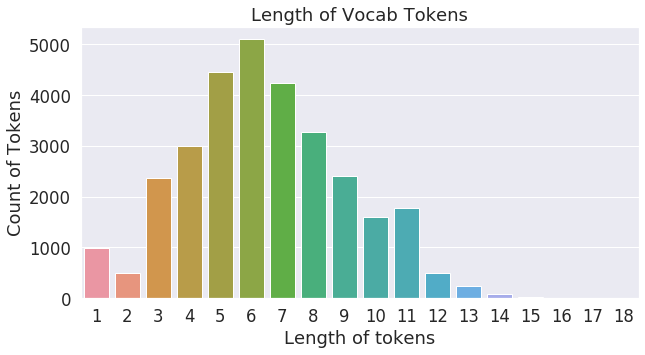

In [24]:
sns.set(style='darkgrid', palette = 'pastel')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Length of Vocab Tokens')
plt.xlabel('Length of tokens')
plt.ylabel('Count of Tokens')

print('Max length of the tokens :', max(token_lengths))

In [26]:
for token in tokenizer.vocab.keys():
  print(token[0:2])

[P
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[U
[C
[S
[M
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[u
[

In [0]:
#Since the above tokens contain many that are simply double hashes, let's just see the number of tokens without hashes
subwords = 0

length_subwords = []

for token in tokenizer.vocab.keys():
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        length_subwords.append(length)

In [28]:
subwords

5828

In [29]:
length_subwords

[1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 2,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 4,
 3,
 2,
 3,
 3,
 2,
 5,
 4,
 2,
 3,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 5,
 2,
 3,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 1,
 4,
 3,
 3,
 2,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 3,
 2,
 3,
 2,
 4,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 5,
 4,
 2,
 3,
 4,
 3,
 7,
 3,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 1,
 2,
 3,
 4,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 4,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 3,
 5,
 3,
 3,
 2,
 3,
 4,
 3,
 4,
 4,
 3,
 4,
 3,
 2,
 4,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 4,
 2,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 2,
 3,
 3,
 4,
 2,
 2,
 4,
 4,
 2,
 3,
 5,
 3,
 2,
 2,


In [32]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
percent = float(subwords) / vocab_size * 100.0

print('%.1f%%' % percent)

Number of subwords: 5,828 of 30,522
19.1%


Text(0, 0.5, 'Count of Subwords containing ##')

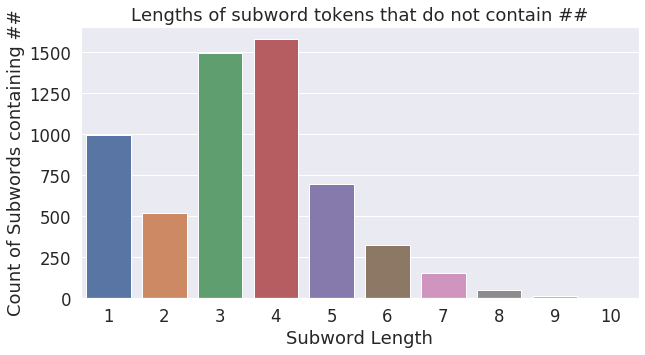

In [34]:
sns.countplot(length_subwords)
plt.title('Lengths of subword tokens that do not contain ##')
plt.xlabel('Subword Length')
plt.ylabel('Count of Subwords containing ##')

In [47]:
#What about numbers though? So far, we have seen BERT vocab for numbers, words, alphabets etc. But numbers? 
numeral_count = 0

for token in tokenizer.vocab.keys():
    if token.isdigit():
       numeral_count += 1
print('{:,} numerals in BERT'.format(numeral_count))


881 numerals in BERT


In [49]:
#Of the many possibilities in BERT for numbers, one is date. Let's see if it contains decimals as well?
decimal_count = 0

for token in tokenizer.vocab.keys():
    if token.isdecimal():
       decimal_count += 1
print('{:,} decimals in BERT'.format(decimal_count))

861 decimals in BERT


In [51]:
for token in tokenizer.vocab.keys(): #decimals also have the same result. However decimals are less in number as they do not contain digits as special characters as can be seen after 9
  if token.isdigit():
    print(token)

0
1
2
3
4
5
6
7
8
9
²
³
¹
⁰
⁴
⁵
⁶
⁷
⁸
⁹
₀
₁
₂
₃
₄
₅
₆
₇
₈
₉
10
000
2010
2011
12
2012
2008
2009
2013
2007
2006
2014
15
20
18
2015
11
2016
30
2005
16
14
13
2017
25
2004
2000
17
24
2003
2002
100
21
19
2001
22
23
1999
28
26
27
1998
1997
1996
50
29
2018
1995
1994
1992
1993
31
40
1991
1990
1989
1988
1987
1986
1985
1984
1980
500
1983
1982
1979
1981
200
1972
1976
1978
1974
1975
1977
1970
1968
1973
1945
1971
45
60
1969
1967
35
65
1964
1966
1965
32
1960
1944
1963
1962
1942
80
1961
1943
1956
1958
1959
1941
1940
1948
1957
1939
1946
1950
90
33
70
1955
300
1952
00
1947
44
36
1954
1953
1949
34
1951
64
38
1938
37
1936
1918
400
75
1937
42
1935
1920
39
48
1930
1919
1933
1914
1934
55
1917
41
1929
1928
1932
47
52
43
1931
49
1927
1922
46
1924
1925
51
1912
1926
1921
978
1923
1915
1916
1910
150
1913
54
1900
600
56
1911
53
1908
95
59
800
58
57
1905
08
1906
1907
250
1909
99
85
09
1904
05
07
06
66
1902
1901
1903
62
98
72
04
01
96
97
03
120
1898
88
61
93
76
67
1899
02
63
1890
91
92
77
68
78
81
1895
1896
1897
700